# Description: In this Project we use Python to get stock market data from Yahoo finance for analysis and Plot the data using matplotlib

## Muedi Mbambala 
### 10 september 2020


In [10]:
from pandas_datareader import data
from pandas_datareader._utils import RemoteDataError
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime


In [15]:
START_DATE = '2005-01-01'
END_DATE = str(datetime.now().strftime('%Y-%m-%d') )

In [16]:
JHB_STOCK = 'CLH.JO'
US_STOCK = 'TSLA'

In [17]:
def get_stats(stock_data):
  return{
      'last':np.mean(stock_data.tail(1)),
      'short_mean':np.mean(stock_data.tail(20)),
      'long_mean':np.mean(stock_data.tail(200)),
      'short_rolling':stock_data.rolling(window=20).mean(),
      'long_rolling':stock_data.rolling(window=200).mean()
  }

In [22]:
def clean_data(stock_data, col):
  weekdays = pd.date_range(start=START_DATE, end=END_DATE)
  clean_data = stock_data[col].reindex(weekdays)
  return clean_data.fillna(method = 'ffill')

In [31]:
def create_plot(stock_data,ticker):
  stats = get_stats(stock_data)
  plt.subplots(figsize=(12,8))
  plt.plot(stock_data, label = ticker)
  plt.plot(stats['short_rolling'], label = "20 day short rolling mean")
  plt.plot(stats['long_rolling'], label = "200 day short rolling mean")
  plt.xlabel('Date')
  plt.ylabel('Adj Close')
  plt.legend()
  plt.title('Stock Price over time')
  plt.show


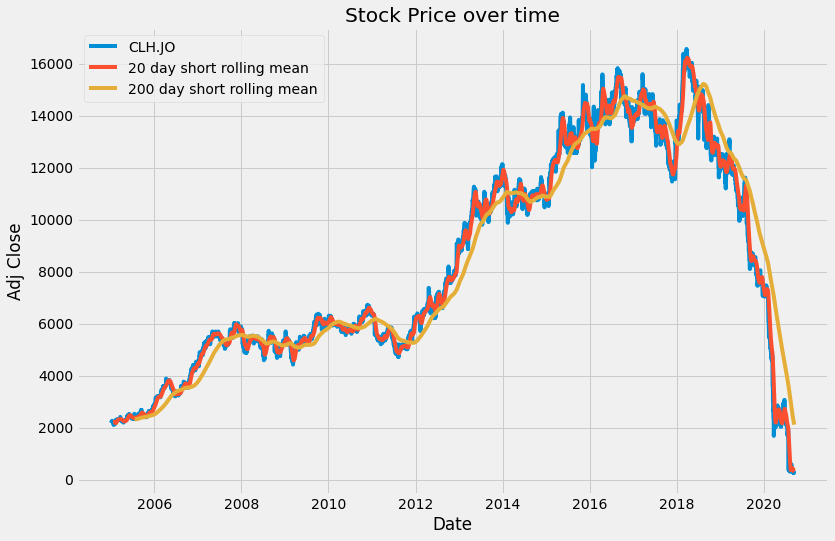

In [32]:
def get_data(ticker):
  try:
    stock_data = data.DataReader(ticker, 'yahoo', START_DATE, END_DATE)

    adj_close=clean_data(stock_data, 'Adj Close')
    create_plot(adj_close, ticker)

  except RemoteDataError:
    print('No data found for {t}'.format(t=ticker))

get_data(JHB_STOCK)